# Export png image and csv results of speedtest bash script

**Made by Arjun Khera**

In [389]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re 
import datetime
import sys
%matplotlib inline

In [390]:
daysOfWeek = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
monthsofyear = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

In [391]:
# providing the file name through command line
# filename =  sys.argv[1]

# to manually provide the filename
filename = "log240318.txt"

In [392]:
fin = open(filename, "rt") 

In [393]:
downloadSpeed = []
uploadSpeed = []
time = []
date = []
day = []
month = []
year = []

In [394]:
for i in fin:
    # Obtain the time and day of test
    for j in daysOfWeek:
        if (i.startswith(j)):
            strTime = ''.join(i)
            day.append(j)
            time.append(re.findall(r'\d+',strTime))
            break;
    
    # Obtain month of test
    for k in monthsofyear:
        if k in i:
            month.append(k)
            break;
    
    # Obtain download speed
    if (i.startswith("Download")):
        strdown = ''.join(i)
        downloadSpeed.append(re.findall(r'\d+',strdown))
    
    # Obtain upload speed
    if (i.startswith("Upload")):
        strup = ''.join(i)
        uploadSpeed.append(re.findall(r'\d+',strup))
    

In [395]:
timereadings = []
downloadreadings = []
uploadreadings = []

In [396]:
for i in time:
    date.append(i[0])
    year.append(i[4])
    timereadings.append(i[1]+":"+i[2])    

In [397]:
timereadings

['20:02',
 '20:13',
 '20:24',
 '20:34',
 '20:45',
 '20:55',
 '21:06',
 '21:17',
 '21:48',
 '21:59',
 '22:10',
 '22:21',
 '22:31',
 '22:42',
 '22:53',
 '23:03',
 '23:14',
 '23:24',
 '23:35']

In [398]:
for i in downloadSpeed:
    downloadreadings.append(i[0]+"."+i[1])

In [399]:
downloadreadings

['17.18',
 '16.86',
 '17.39',
 '17.19',
 '17.00',
 '17.20',
 '17.20',
 '15.71',
 '17.10',
 '15.65',
 '17.23',
 '17.19',
 '16.21',
 '17.09',
 '17.25',
 '15.93',
 '17.50',
 '17.19',
 '16.28']

In [400]:
for i in uploadSpeed:
    uploadreadings.append(i[0]+"."+i[1])

In [401]:
uploadreadings

['2.66',
 '2.19',
 '2.11',
 '2.23',
 '2.20',
 '2.66',
 '2.65',
 '2.65',
 '2.54',
 '2.65',
 '2.62',
 '2.52',
 '2.50',
 '2.66',
 '2.55',
 '2.63',
 '2.66',
 '2.62',
 '2.49']

In [402]:
xaxis = np.arange(len(timereadings))

In [403]:
# construct a dataframe for exporting data as csv
df = pd.DataFrame(list(zip(xaxis,date,day,month,timereadings,year,downloadreadings,uploadreadings)), columns = ["Serial No","Date","Day","Month","Time","Year","Download Speed","Upload Speed"])

In [404]:
df

,Serial No,Date,Day,Month,Time,Year,Download Speed,Upload Speed
0,0,24,Sat,Mar,20:02,2018,17.18,2.66
1,1,24,Sat,Mar,20:13,2018,16.86,2.19
2,2,24,Sat,Mar,20:24,2018,17.39,2.11
3,3,24,Sat,Mar,20:34,2018,17.19,2.23
4,4,24,Sat,Mar,20:45,2018,17.00,2.20
5,5,24,Sat,Mar,20:55,2018,17.20,2.66
6,6,24,Sat,Mar,21:06,2018,17.20,2.65
7,7,24,Sat,Mar,21:17,2018,15.71,2.65
8,8,24,Sat,Mar,21:48,2018,17.10,2.54
9,9,24,Sat,Mar,21:59,2018,15.65,2.65


In [405]:
# export as csv
df.to_csv(filename+".csv")

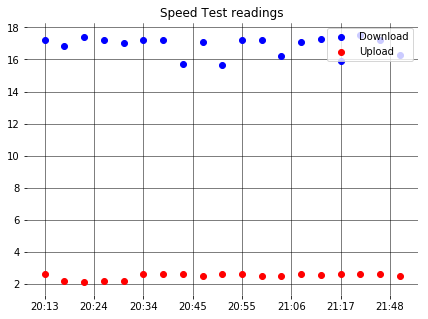

In [406]:
# draw a graph of upload and download speeds against the timestamp pf readings

fig,ax = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(7)


ax.plot(xaxis,downloadreadings,'bo',label="Download")
ax.plot(xaxis,uploadreadings,'ro',label="Upload")

ax.set_xticklabels(timereadings)

ax.set_title("Speed Test readings")
ax.legend(loc='upper right')
ax.grid(color='k', linestyle='-', linewidth=0.5)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# export the graph as png
fig.savefig(filename+".png")

In [407]:
# close the file
fin.close()                   